### Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
fuel_data = pd.read_csv ("E:\Sankhyana Training\Datasets\FuelConsumptionCo2.csv")
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# checking the total number of rows and columns
fuel_data.shape

(1067, 13)

In [6]:
# summary statistics
fuel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [7]:
# Checking the datatypes of our data columns
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
# checking for the null values
fuel_data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
# Geting the main columns needed for the analysis
fuel = fuel_data[['ENGINESIZE', 'CO2EMISSIONS']]
fuel.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


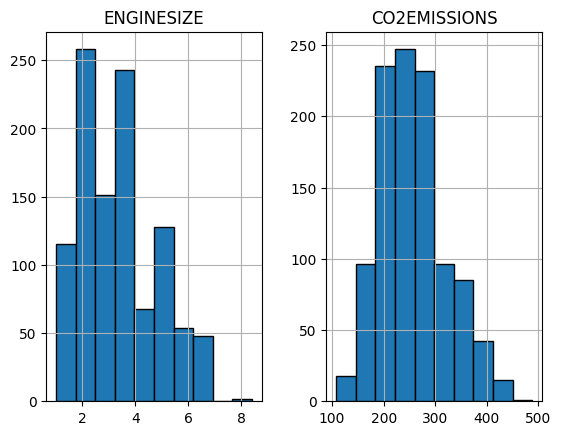

In [18]:
# Visualizing the two columsn
import matplotlib.pyplot as plt
fuel.hist (edgecolor = 'black')
plt.show()

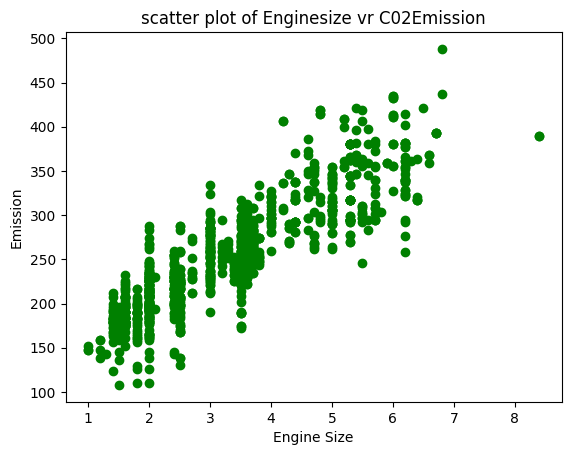

In [24]:
# ploting a scatter plot of Enginesize vr C02Emission

plt.scatter(fuel.ENGINESIZE	, fuel.CO2EMISSIONS, color = "green")
plt.xlabel ("Engine Size")
plt.ylabel("Emission")
plt.title("scatter plot of Enginesize vr C02Emission")
plt.show()

In [26]:
fuel.shape

(1067, 2)

In [29]:
# spliting the data to testing set and training set

training_set = fuel[: int(len(fuel)*0.8)]
training_set.shape

(853, 2)

In [36]:
training_set.tail()

,ENGINESIZE,CO2EMISSIONS
848,3.5,251
849,3.5,271
850,2.0,214
851,3.5,244
852,3.5,253


In [34]:
testing_set = fuel [(int(len(fuel)*0.8)):]
testing_set.shape

(214, 2)

In [35]:
testing_set.tail()

,ENGINESIZE,CO2EMISSIONS
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260
1066,3.2,294


### Training the model

In [37]:
from sklearn import linear_model

In [42]:
regr = linear_model.LinearRegression()

train_x= np.array (training_set[["ENGINESIZE"]])   # selecting the independent variable from the training set
train_y= np.array (training_set[["CO2EMISSIONS"]])  

regr.fit(train_x, train_y) # fitting the linear regression model to training data (train_x and train_y)

print ("Coefficient", regr.coef_)  # calculating the coeficient

print ("Intercept", regr.intercept_) # calculating the intercept



Coefficient [[38.79512384]]
Intercept [127.16989951]


#### Y = m*X + c

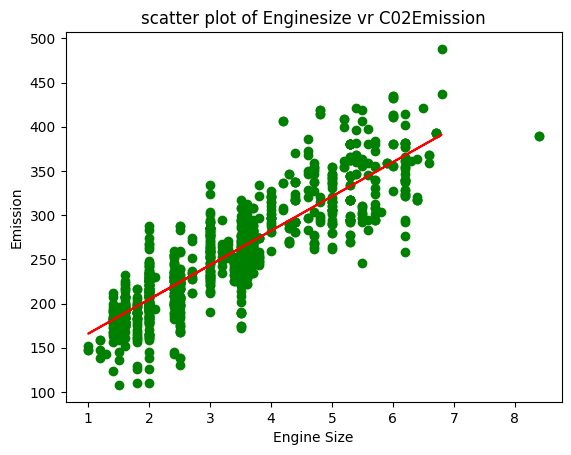

In [45]:
plt.scatter(fuel.ENGINESIZE	, fuel.CO2EMISSIONS, color = "green")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, color = 'r') # y = mx+c
plt.xlabel ("Engine Size")
plt.ylabel("Emission")
plt.title("scatter plot of Enginesize vr C02Emission")
plt.show()

#### Making prediction from unkwon value

In [51]:
# creating a prediction function

def get_resgression_method (input_feature, intercept, slope):
    predicted_values = input_feature*slope + intercept   # y= mx+c
    return predicted_values

In [53]:
my_engine_size = 2

estimated_emission= get_resgression_method(my_engine_size, regr.coef_, regr.intercept_ )
estimated_emission

array([[293.13492285]])

### Model Evaluation

In [54]:
from sklearn.metrics import r2_score

In [56]:
test_x= np.array (testing_set[["ENGINESIZE"]])   # selecting the independent variable from the testing set
test_y= np.array (testing_set[["CO2EMISSIONS"]]) # selecting the dependent variable from the testing set

test_y_ = regr.predict(test_x)

In [57]:
print(r2_score(test_y, test_y_))

0.7861345372905517
